In [1]:
import numpy as np
import matplotlib.pyplot as plt

# La regresión lineal como primer ejemplo de aprendizaje automatizado

En primer lugar se estudiará el caso en el que una regresión lineal ajusta el conjunto de datos

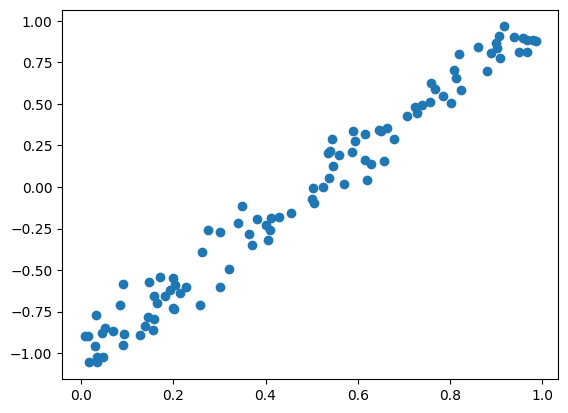

In [2]:
a_true = 2   
b_true = -1
rng = np.random.default_rng()
x = rng.uniform(0,1,100)    # las ordenadas al origen va a ser nuestra variable (feature)
y = a_true *x + b_true + rng.normal(0,0.1, 100)   # los valores a ajustar son una recta
plt.scatter(x,y)

In [3]:
def loss(y, y_hat):
    '''
    función que computa la función de pérdida MSE. 
    y: valores predichos por el modelo
    y_hat: valores verdaderos
    '''
    return np.mean((y_hat-y)**2)

def dloss(a, b, x, y_hat):
    '''
    Gradiente de la función de pérdida
    a: pendiente propuesta para el modelo
    b: ordenada al origen propuesta para el modelo
    da: derivada en la direccion de a
    db: derivada en la direccion de b
    '''
    da = -2*np.mean((y_hat-a*x-b)*x)
    db = -2*np.mean((y_hat-a*x-b))
    return da, db

def train(x, y_hat, epochs = 10, a = 5, b=5, lr = 0.2):
    '''
    Funcion que entrena al modelo encontrando los valores optimos de los parametros (a y b)
    x: valor de entrada de la variable (feature)
    y_hat: valor verdadero de la funcion en x
    epochs: numero de veces que se recorrera todo el set de datos
    lr: tasa de aprendizaje (learning rate)
    '''
    grad = dloss(a,b,x,y_hat)   # calculo del gradiente para el paso cero
    history = [[a,b, grad[0], grad[1], loss(a*x+b,y_hat)]] # guardo los valores para observar el entrenamiento
    for i in range(epochs):
        grad = dloss(a,b,x,y_hat)   # calculo del gradiente para todo el conjunto de datos
        a -= lr * grad[0]        # paso de descenso por el gradiente
        b -=  lr * grad[1]        # paso de descenso por el gradiente
        history.append([a,b, grad[0], grad[1], loss(a*x+b,y_hat)])  # guardo la historia
    return a,b, history

valores optimos: (2.022323507492487, -1.0160118968653271)


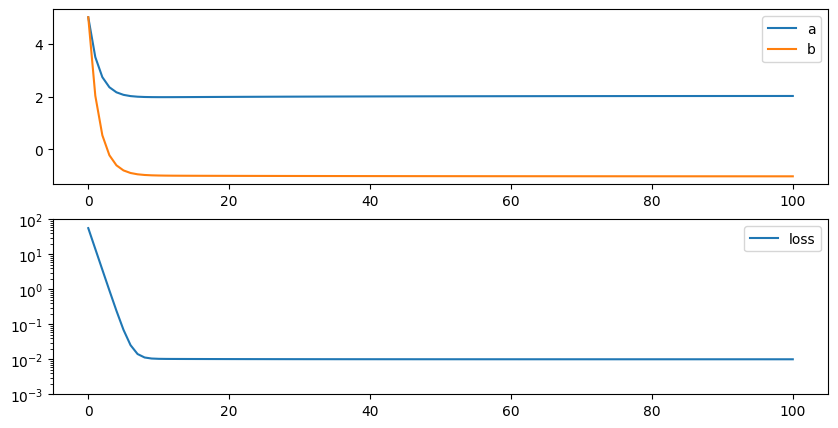

In [9]:
# Entrenamos nuestro modelo
a_opt,b_opt,hist = train(x, y_hat = y, epochs= 100)
print(f'valores optimos: {a_opt, b_opt}')
hist = np.array(hist)
fig, axs = plt.subplots(2,1, figsize = (10,5))
axs[0].plot(hist[:,0], label='a')
axs[0].plot(hist[:,1], label = 'b')
axs[0].legend()
axs[1].semilogy(hist[:,4], label = 'loss')
axs[1].set_ylim(1e-3,100)
axs[1].legend()

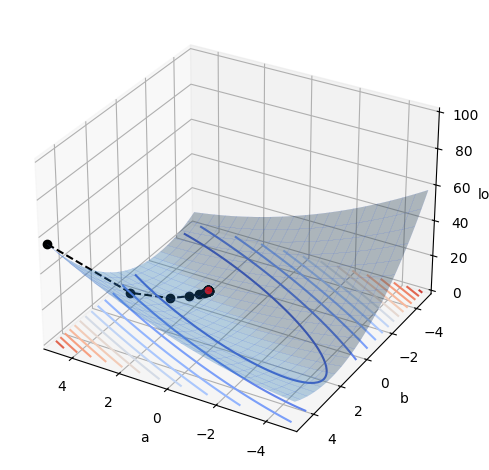

In [32]:
from mpl_toolkits.mplot3d import axes3d

a,b  = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100))
ax = plt.figure().add_subplot(projection='3d')
Z = []
for i in range(100):
    aux = []
    for j in range(100):
       aux.append(loss(a[i,j]*x+b[i,j], y))
    Z.append(aux)
Z = np.array([[loss(a[i,j]*x+b[i,j], y) for j in range(100)]for i in range(100)])
# Z = np.array(Z)

# Plot the 3D surface
ax.plot_surface(a, b, Z, edgecolor='royalblue', lw=0.05, alpha=0.3, rstride = 5, cstride = 5)
ax.scatter3D(a_opt, b_opt, loss(a_opt * x + b_opt, y ), color = 'r')


# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(a, b, Z, 15, zdir='z', offset=0, cmap='coolwarm')
# ax.contour(a, b, Z, zdir='x', offset=-5, cmap='coolwarm')
# ax.contour(a, b, Z, zdir='y', offset=-5, cmap='coolwarm')
ax.plot(hist[:,0], hist[:,1], hist[:,4],'k--o')
ax.view_init(30, 120)
ax.set(xlim=(-5, 5), ylim=(-5, 5), zlim=(0, 100), 
       xlabel='a', ylabel='b', zlabel='loss')
plt.tight_layout()

## Efectos de la tasa de aprendizaje

Si se repite el proceso para una tasa de aprendizaje mucho menor se observa que se necesitan muchas epochs para alcanzar los valores optimos

valores optimos: (2.213173024063527, -0.5015091153134623)


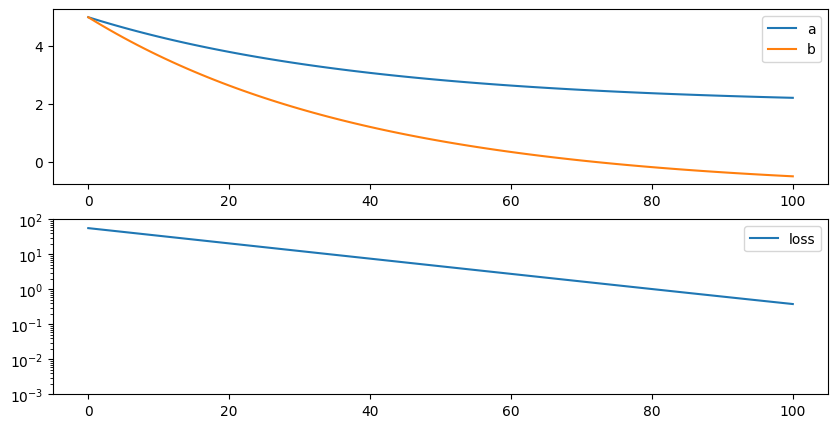

In [34]:
# Entrenamos nuestro modelo
a_opt,b_opt,hist = train(x, y_hat = y, epochs= 100, lr= 0.01)
print(f'valores optimos: {a_opt, b_opt}')
hist = np.array(hist)
fig, axs = plt.subplots(2,1, figsize = (10,5))
axs[0].plot(hist[:,0], label='a')
axs[0].plot(hist[:,1], label = 'b')
axs[0].legend()
axs[1].semilogy(hist[:,4], label = 'loss')
axs[1].set_ylim(1e-3,100)
axs[1].legend()

Si la tasa de aprendizaje por el contrario es grande pero no en exceso se observa un comportamiento oscilatorio que converge

valores optimos: (2.0257903114176967, -1.0177755747442003)


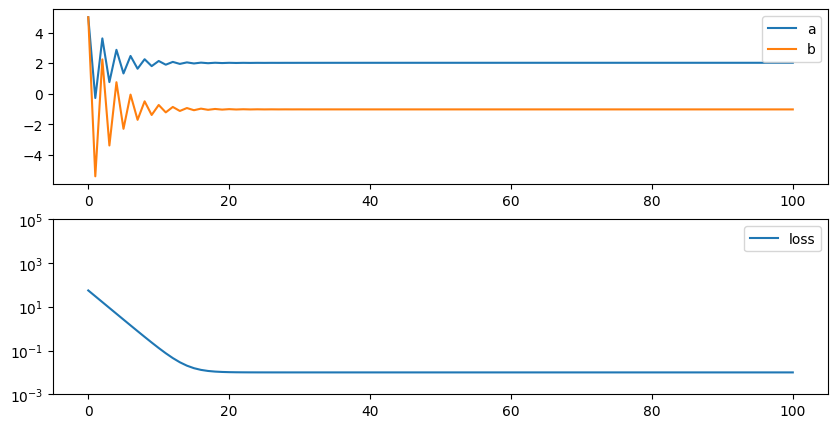

In [47]:
# Entrenamos nuestro modelo
a_opt,b_opt,hist = train(x, y_hat = y, epochs= 100, lr= 0.7)
print(f'valores optimos: {a_opt, b_opt}')
hist = np.array(hist)
fig, axs = plt.subplots(2,1, figsize = (10,5))
axs[0].plot(hist[:,0], label='a')
axs[0].plot(hist[:,1], label = 'b')
axs[0].legend()
axs[1].semilogy(hist[:,4], label = 'loss')
axs[1].set_ylim(1e-3,1e5)
axs[1].legend()
plt.show()

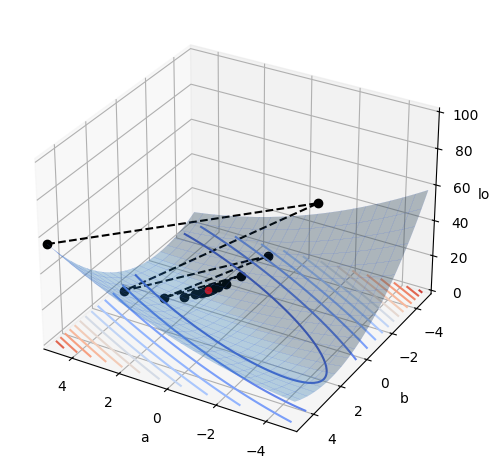

In [48]:
from mpl_toolkits.mplot3d import axes3d

a,b  = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100))
ax = plt.figure().add_subplot(projection='3d')
Z = []
for i in range(100):
    aux = []
    for j in range(100):
       aux.append(loss(a[i,j]*x+b[i,j], y))
    Z.append(aux)
Z = np.array([[loss(a[i,j]*x+b[i,j], y) for j in range(100)]for i in range(100)])
# Z = np.array(Z)

# Plot the 3D surface
ax.plot_surface(a, b, Z, edgecolor='royalblue', lw=0.05, alpha=0.3, rstride = 5, cstride = 5)
ax.scatter3D(a_opt, b_opt, loss(a_opt * x + b_opt, y ), color = 'r')


# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(a, b, Z, 15, zdir='z', offset=0, cmap='coolwarm')
# ax.contour(a, b, Z, zdir='x', offset=-5, cmap='coolwarm')
# ax.contour(a, b, Z, zdir='y', offset=-5, cmap='coolwarm')
ax.plot(hist[:,0], hist[:,1], hist[:,4],'k--o')
ax.view_init(30, 120)
ax.set(xlim=(-5, 5), ylim=(-5, 5), zlim=(0, 100), 
       xlabel='a', ylabel='b', zlabel='loss')
plt.tight_layout()

Si la tasa de aprendizaje por el contrario es excesiva se observa un comportamiento divergente

valores optimos: (82920.7326535595, 162989.57240444)


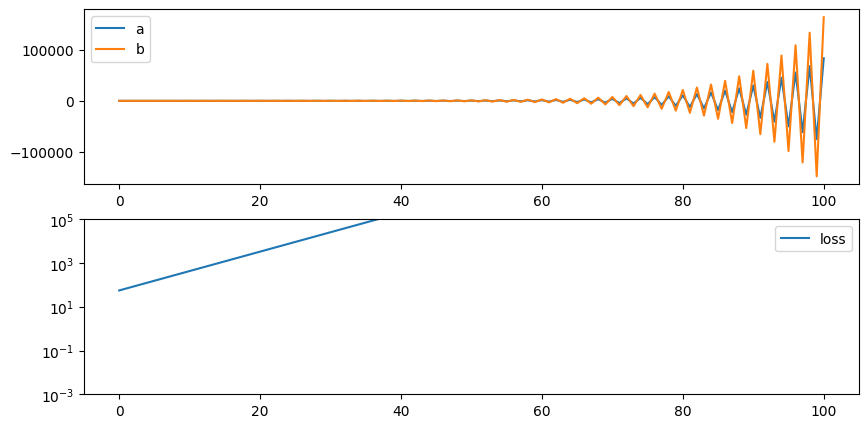

In [53]:
# Entrenamos nuestro modelo
a_opt,b_opt,hist = train(x, y_hat = y, epochs= 100, lr= 0.85)
print(f'valores optimos: {a_opt, b_opt}')
hist = np.array(hist)
fig, axs = plt.subplots(2,1, figsize = (10,5))
axs[0].plot(hist[:,0], label='a')
axs[0].plot(hist[:,1], label = 'b')
axs[0].legend()
axs[1].semilogy(hist[:,4], label = 'loss')
axs[1].set_ylim(1e-3,1e5)
axs[1].legend()
plt.show()

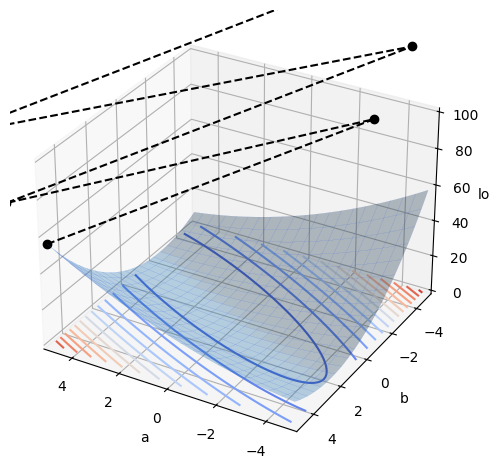

In [54]:
from mpl_toolkits.mplot3d import axes3d

a,b  = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100))
ax = plt.figure().add_subplot(projection='3d')
Z = []
for i in range(100):
    aux = []
    for j in range(100):
       aux.append(loss(a[i,j]*x+b[i,j], y))
    Z.append(aux)
Z = np.array([[loss(a[i,j]*x+b[i,j], y) for j in range(100)]for i in range(100)])
# Z = np.array(Z)

# Plot the 3D surface
ax.plot_surface(a, b, Z, edgecolor='royalblue', lw=0.05, alpha=0.3, rstride = 5, cstride = 5)
ax.scatter3D(a_opt, b_opt, loss(a_opt * x + b_opt, y ), color = 'r')


# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(a, b, Z, 15, zdir='z', offset=0, cmap='coolwarm')
# ax.contour(a, b, Z, zdir='x', offset=-5, cmap='coolwarm')
# ax.contour(a, b, Z, zdir='y', offset=-5, cmap='coolwarm')
ax.plot(hist[:,0], hist[:,1], hist[:,4],'k--o')
ax.view_init(30, 120)
ax.set(xlim=(-5, 5), ylim=(-5, 5), zlim=(0, 100), 
       xlabel='a', ylabel='b', zlabel='loss')
plt.tight_layout()